In [2]:
import os
import random
import cv2
import numpy as nb
import matplotlib.pyplot as plt 
from tqdm import tqdm

In [3]:
DATADIR="F:/AIUB/13th semester/CVPR/lab/Cat and Dog"

TRAIN_DATADIR=os.path.join(DATADIR,'training_set/training_set')
TEST_DATADIR=os.path.join(DATADIR,'test_set/test_set')
print(TRAIN_DATADIR)
print(TEST_DATADIR)


F:/AIUB/13th semester/CVPR/lab/Cat and Dog\training_set/training_set
F:/AIUB/13th semester/CVPR/lab/Cat and Dog\test_set/test_set


In [4]:
CATEGORIES=[]
for c in os.listdir(TRAIN_DATADIR):
    #print(c)
    CATEGORIES.append(c)

print(CATEGORIES)

['cats', 'dogs']


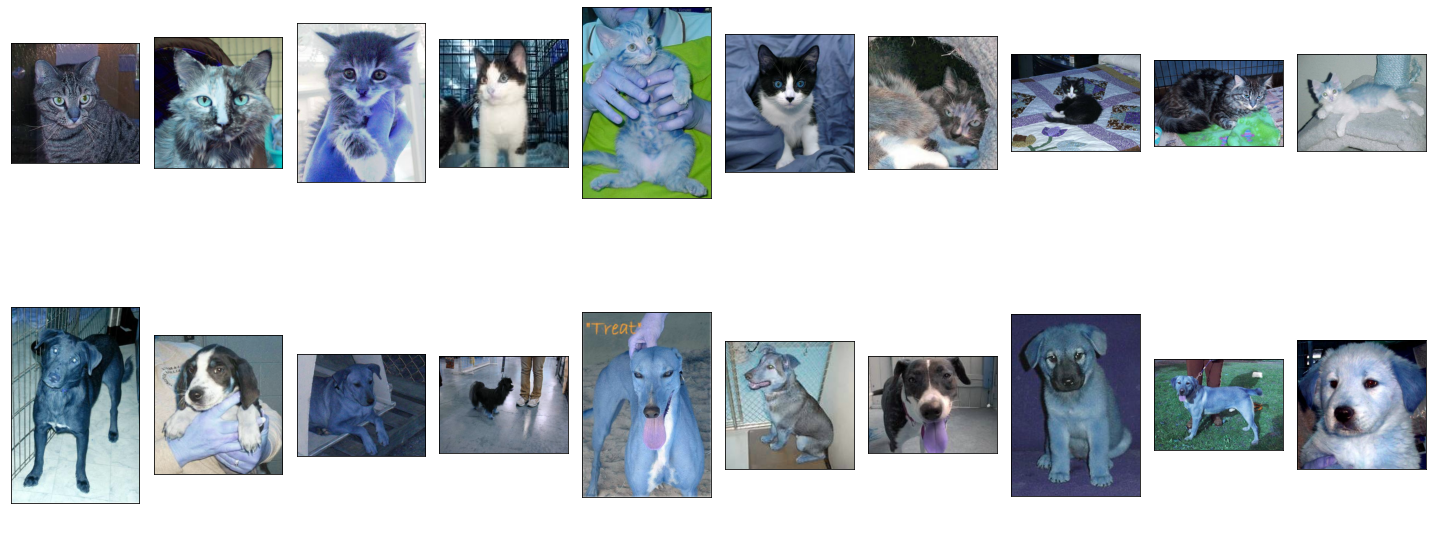

In [5]:
plt.figure(figsize=(20,10))
tmp=0
for c in CATEGORIES:
    path=os.path.join(TRAIN_DATADIR,c)
    #print(path)
    for img in os.listdir(path):
        img_arr=cv2.imread(os.path.join(path,img))
        #print(img)
        plt.subplot(2,10,tmp+1)
        plt.imshow(img_arr)
        plt.xticks([])
        plt.yticks([])
        if tmp%10==0:
          plt.xlabel(c, color='white', fontsize=20)
        tmp+=1
        if tmp%10==0:
          break;

plt.tight_layout()
plt.show()

In [6]:
train_data=[]
test_data=[]
IMG_SIZE=224

In [7]:
for c in CATEGORIES:
    path=os.path.join(TRAIN_DATADIR,c)
    class_num=CATEGORIES.index(c)
    #print(path)
    for img in tqdm(os.listdir(path)):
        img_arr=cv2.imread(os.path.join(path,img))
        try:
          img_resized=cv2.resize(img_arr,(IMG_SIZE,IMG_SIZE))
          train_data.append([img_resized,class_num])
        except Exception as e:
            pass

print(len(train_data))

100%|██████████| 4006/4006 [00:16<00:00, 238.38it/s]

8005


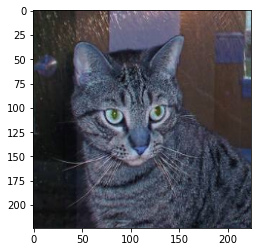

0


In [8]:
plt.figure
plt.imshow(train_data[0][0])
plt.show()
print(train_data[0][1])


In [9]:
for c in CATEGORIES:
    path=os.path.join(TEST_DATADIR,c)
    class_num=CATEGORIES.index(c)
    #print(path)
    for img in tqdm(os.listdir(path)):
        img_arr=cv2.imread(os.path.join(path,img))
        try:
          img_resized=cv2.resize(img_arr,(IMG_SIZE,IMG_SIZE))
          test_data.append([img_resized,class_num])
        except Exception as e:
            pass

print(len(test_data))

100%|██████████| 1013/1013 [00:04<00:00, 229.33it/s]

2023


In [10]:
random.shuffle(train_data)
random.shuffle(test_data)

In [11]:
X_train=[]
Y_train=[]

for img, label in train_data:
    X_train.append(img)
    Y_train.append(label)

X_train=nb.array(X_train).astype('float32').reshape(-1,IMG_SIZE,IMG_SIZE,3)
Y_train=nb.array(Y_train)

In [12]:
print(X_train.shape)
print(Y_train.shape)

(8005, 224, 224, 3)
(8005,)


In [13]:
X_test=[]
Y_test=[]

for img, label in test_data:
    X_test.append(img)
    Y_test.append(label)

X_test=nb.array(X_test).astype('float32').reshape(-1,IMG_SIZE,IMG_SIZE,3)
Y_test=nb.array(Y_test)

print(X_test.shape)
print(Y_test.shape)

(2023, 224, 224, 3)
(2023,)


In [14]:
import pickle

In [15]:
p=open('./X_train.pickle','wb')
pickle.dump(X_train,p)
p.close()

p=open('./Y_train.pickle','wb')
pickle.dump(Y_train,p)
p.close()

In [16]:
p=open('./X_test.pickle','wb')
pickle.dump(X_test,p)
p.close()

p=open('./Y_test.pickle','wb')
pickle.dump(Y_test,p)
p.close()

In [17]:
#DATASET prepared and saved into pickle...

In [18]:
import numpy as np 
import matplotlib.pyplot as plt
import tensorflow as tf
import pickle

In [19]:
pickle_in=open("X_train.pickle",'rb')
X_train=pickle.load(pickle_in)

pickle_in=open("Y_train.pickle",'rb')
Y_train=pickle.load(pickle_in)

pickle_in=open("X_test.pickle",'rb')
X_test=pickle.load(pickle_in)

pickle_in=open("Y_test.pickle",'rb')
Y_test=pickle.load(pickle_in)

print(f"X_train = {X_train.shape} Y_train = {Y_train.shape}")
print(f"X_train = {X_test.shape} Y_train = {Y_test.shape}")

X_train = (8005, 224, 224, 3) Y_train = (8005,)
X_train = (2023, 224, 224, 3) Y_train = (2023,)


In [20]:
print(f"X_train = {X_train.shape} Y_train = {Y_train.shape}")
print(f"X_test = {X_test.shape} Y_test = {Y_test.shape}")

X_train = (8005, 224, 224, 3) Y_train = (8005,)
X_test = (2023, 224, 224, 3) Y_test = (2023,)


In [21]:
from tensorflow.keras.callbacks import EarlyStopping
os.environ['TFF_CPP_MIN_LOG_LEVEL']='2'

%matplotlib inline

In [22]:
X_train_norm=np.empty_like(X_train)
X_test_norm=np.empty_like(X_test)

In [23]:
mean_rgb=np.mean(X_train, axis=(0,1,2))
print(mean_rgb)

[10.693072 10.693072 10.693072]


In [24]:
for i in range(len(X_train)):
  for c in range(3):
    if c==0:
      X_train_norm[i,:,:,c]=X_train[i,:,:,c]-mean_rgb[0]
    elif c==1:
      X_train_norm[i,:,:,c]=X_train[i,:,:,c]-mean_rgb[1]
    else:
      X_train_norm[i,:,:,c]=X_train[i,:,:,c]-mean_rgb[2]
      

In [25]:
for i in range(len(X_test)):
  for c in range(3):
    if c==0:
      X_test_norm[i,:,:,c]=X_test[i,:,:,c]-mean_rgb[0]
    elif c==1:
      X_test_norm[i,:,:,c]=X_test[i,:,:,c]-mean_rgb[1]
    else:
      X_test_norm[i,:,:,c]=X_test[i,:,:,c]-mean_rgb[2]

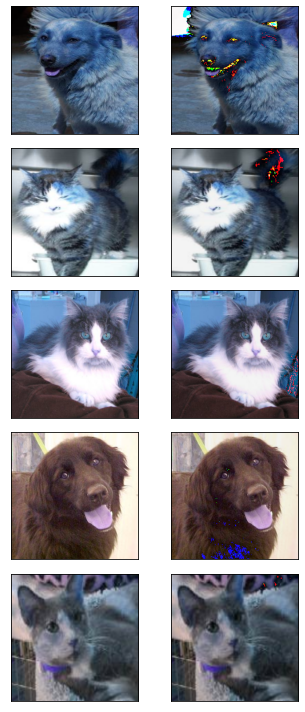

In [26]:
c = 0
plt.figure(figsize=(5,10))
for i in range(5):
    plt.subplot(5,2,c+1)
    plt.imshow(X_train[i].astype('uint8'))
    plt.xticks([])
    plt.yticks([])
    
    plt.subplot(5,2,c+2)
    plt.imshow(X_train_norm[i].astype('uint8'))
    plt.xticks([])
    plt.yticks([])

    c += 2
    
plt.tight_layout()
plt.show()

In [27]:
model = tf.keras.Sequential([
   
    tf.keras.Input(shape=X_train_norm.shape[1:]),
    
    tf.keras.layers.Conv2D(filters=64, kernel_size=(3,3), strides=(1,1), padding='same'),
    tf.keras.layers.Activation('relu'),
    tf.keras.layers.Conv2D(filters=64, kernel_size=(3,3), strides=(1,1), padding='same'),
    tf.keras.layers.Activation('relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid'),
    
    
    tf.keras.layers.Conv2D(filters=128, kernel_size=(3,3), strides=(1,1), padding='same'),
    tf.keras.layers.Activation('relu'),
    tf.keras.layers.Conv2D(filters=128, kernel_size=(3,3), strides=(1,1), padding='same'),
    tf.keras.layers.Activation('relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid'),
    
    tf.keras.layers.Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), padding='same'),
    tf.keras.layers.Activation('relu'),
    tf.keras.layers.Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), padding='same'),
    tf.keras.layers.Activation('relu'),
    tf.keras.layers.Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), padding='same'),
    tf.keras.layers.Activation('relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid'),
    
    
    tf.keras.layers.Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), padding='same'),
    tf.keras.layers.Activation('relu'),
    tf.keras.layers.Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), padding='same'),
    tf.keras.layers.Activation('relu'),
    tf.keras.layers.Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), padding='same'),
    tf.keras.layers.Activation('relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid'),

    
    tf.keras.layers.Flatten(),
    
    tf.keras.layers.Dense(units=4096),
    tf.keras.layers.Activation('relu'),
    tf.keras.layers.Dropout(0.5),
    
    tf.keras.layers.Dense(units=4096),
    tf.keras.layers.Activation('relu'),
    tf.keras.layers.Dropout(0.5),

    
    tf.keras.layers.Dense(units=2, activation='softmax') 
   
])



In [28]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 224, 224, 64)      1792      
_________________________________________________________________
activation (Activation)      (None, 224, 224, 64)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 224, 224, 64)      36928     
_________________________________________________________________
activation_1 (Activation)    (None, 224, 224, 64)      0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 112, 112, 64)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 112, 112, 128)     73856     
_________________________________________________________________
activation_2 (Activation)    (None, 112, 112, 128)     0

In [29]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001), 
    loss='sparse_categorical_crossentropy', 
    metrics=['accuracy']
)

In [31]:
cb = EarlyStopping(monitor='val_loss', min_delta=0.02, patience=3, restore_best_weights=True)

h = model.fit(x=X_train_norm, y=Y_train, 
              epochs=5, 
              validation_split=0.2,
              batch_size=128,
              callbacks=[cb]
              
             )

Epoch 1/5
47/51 [==========================>...] - ETA: 5:52 - loss: 0.6825 - accuracy: 0.5537

KeyboardInterrupt: 

In [ ]:
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
plt.plot(h.history['accuracy'], '--', label='train accuracy')
plt.plot(h.history['val_accuracy'], '--', label = 'validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend(loc='lower right')

plt.subplot(1,2,2)
plt.plot(h.history['loss'], '--', label='train loss')
plt.plot(h.history['val_loss'], '--', label='validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.legend(loc='upper right')

plt.show()